# Notes


In [33]:
import duckdb
import pandas as pd
from graphviz import Digraph
from fields import Fields

In [34]:
df_2024 = pd.read_parquet("./data/us_births_2024.parquet")
df_2023 = pd.read_parquet("./data/us_births_2023.parquet")
df_2013 = pd.read_parquet("./data/us_births_2013.parquet")


In [35]:
types = pd.concat([df_2024.dtypes, df_2023.dtypes, df_2013.dtypes], axis=1)
types.columns = ["2024", "2023", "2013"]
types

,2024,2023,2013
dob_yy,UInt16,UInt16,UInt16
dob_mm,int64,int64,int64
bfacil,int64,int64,float64
f_bfacil,int64,int64,float64
mage_impflg,category,category,float64
...,...,...,...
f_ca_down,float64,float64,float64
f_ca_downs,int64,int64,int64
f_ca_chrom,int64,int64,int64
f_ca_hypos,int64,int64,int64


In [38]:
col = df_2013["bfacil"]
col

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3940759    1.0
3940760    1.0
3940761    1.0
3940762    1.0
3940763    3.0
Name: bfacil, Length: 3940764, dtype: float64

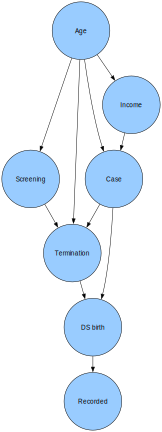

In [32]:
from graphviz import Digraph

dag = Digraph('DownSyndromeModel', format='png')

dag.attr(fontname="Helvetica")
dag.attr("node", fontname="Helvetica")
dag.attr("edge", fontname="Helvetica")

# set font sizes
dag.attr(size="8,6")
dag.attr("node", fontsize="14", style="filled", fillcolor="#99ccff")
dag.attr("edge", fontsize="12")

dag.attr(rankdir="TB", splines="spline")  # Top-to-bottom flow
dag.attr("node", shape="circle", fixedsize="true", width="1.75")

edges = [
    ('Age', 'Case'),
    ('Age', 'Screening'),
    ('Age', 'Termination'),
    ('Age', 'Income'),
    ('Income', 'Case'),
    ('Case', 'Termination'),
    ('Case', 'DS birth'),
    ('Screening', 'Termination'),
    ('Termination', 'DS birth'),
    ('DS birth', 'Recorded'),
]

for src, dst in edges:
    dag.edge(src, dst)

dag


In [10]:
con = duckdb.connect(database="./data/us_births.db", read_only=True)

In [11]:
con.execute(
    """
    SELECT dob_yy, ca_down, count(*) as counts
    FROM us_births
    group by  dob_yy, ca_down
    order by dob_yy, ca_down
    """
).df()

,dob_yy,ca_down,counts
0,0,Y,54
1,0,None,5
2,2004,C,148
3,2004,P,335
4,2004,U,7260
5,2004,None,4111164
6,2005,C,220
7,2005,P,494
8,2005,U,8592
9,2005,None,4136308


In [25]:
df_2012 = pd.read_parquet("./data/us_births_2012.parquet")

In [26]:
# counts of each value of df_2012["uca_downs"]
df_2012["ca_downs"].value_counts().sort_index()

ca_downs
C        665
N    3479415
P       1072
U      14558
Name: count, dtype: int64